In [1]:
#Importing the packages

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
df = pd.read_csv("mushroom.csv")

In [3]:
df.head()


,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,1167,sunken,scaly,white,no,anise,descending,distant,broad,pink,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,1037,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,...,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319
2,309,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,...,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884
3,282,bell,scaly,pink,yes,fishy,notched,close,broad,orange,...,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous,5.226499,20.932692
4,820,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,...,universal,white,none,none,yellow,clustered,urban,poisonous,14.037532,12.545245


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                2000 non-null   int64  
 1   cap_shape                 2000 non-null   object 
 2   cap_surface               2000 non-null   object 
 3   cap_color                 2000 non-null   object 
 4   bruises                   2000 non-null   object 
 5   odor                      2000 non-null   object 
 6   gill_attachment           2000 non-null   object 
 7   gill_spacing              2000 non-null   object 
 8   gill_size                 2000 non-null   object 
 9   gill_color                2000 non-null   object 
 10  stalk_shape               2000 non-null   object 
 11  stalk_root                2000 non-null   object 
 12  stalk_surface_above_ring  2000 non-null   object 
 13  stalk_surface_below_ring  2000 non-null   object 
 14  stalk_co

In [5]:
df.describe()


,Unnamed: 0,stalk_height,cap_diameter
count,2000.000000,2000.000000,2000.000000
mean,624.974000,8.449118,12.314345
std,375.091938,3.697217,7.048845
min,0.000000,2.000000,1.000000
25%,290.000000,5.291009,5.723521
50%,607.000000,8.318596,12.124902
75%,957.250000,11.781272,18.698605
max,1279.000000,15.095066,25.000054


In [6]:
print("Dataset shape:", df.shape)


Dataset shape: (2000, 26)


**Visualizing the count of edible and poisonous mushrooms**

In [7]:
df['class'].value_counts()


poisonous    1400
edible        600
Name: class, dtype: int64

In [8]:
df["class"].unique()


array(['poisonous', 'edible'], dtype=object)

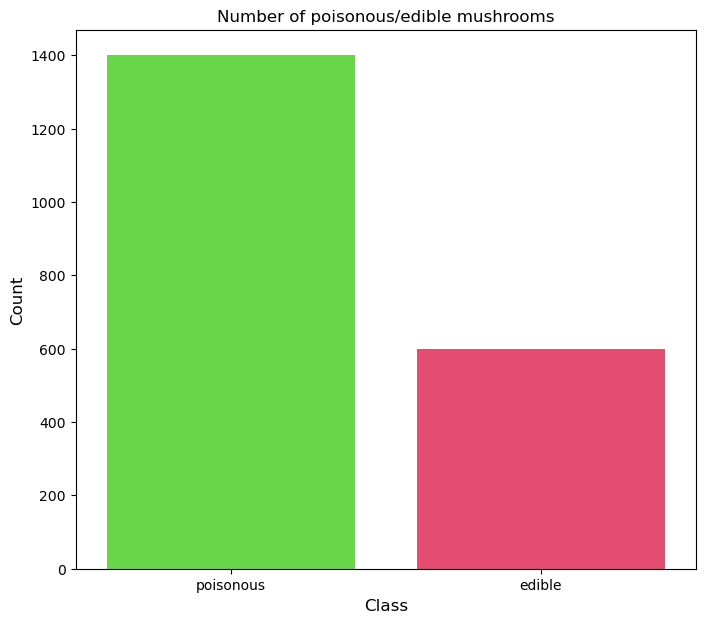

In [9]:
count = df['class'].value_counts()
plt.figure(figsize=(8,7))
sns.barplot(x=count.index, y=count.values, alpha=0.8, palette="prism")
plt.ylabel('Count', fontsize=12)
plt.xlabel('Class', fontsize=12)
plt.title('Number of poisonous/edible mushrooms')
#plt.savefig("mushrooms1.png", format='png', dpi=900)
plt.show()

# **Data Manipulation**

In [10]:
df = df.astype('category')


In [11]:
df.dtypes


Unnamed: 0                  category
cap_shape                   category
cap_surface                 category
cap_color                   category
bruises                     category
odor                        category
gill_attachment             category
gill_spacing                category
gill_size                   category
gill_color                  category
stalk_shape                 category
stalk_root                  category
stalk_surface_above_ring    category
stalk_surface_below_ring    category
stalk_color_above_ring      category
stalk_color_below_ring      category
veil_type                   category
veil_color                  category
ring_number                 category
ring_type                   category
spore_print_color           category
population                  category
habitat                     category
class                       category
stalk_height                category
cap_diameter                category
dtype: object

In [12]:
labelencoder=LabelEncoder()
for column in df.columns:
    df[column] = labelencoder.fit_transform(df[column])

In [13]:
df.head()


,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,889,4,2,7,0,1,1,2,0,7,...,0,0,2,6,3,1,5,1,916,190
1,786,4,0,6,0,1,3,1,1,3,...,1,0,2,6,1,2,5,0,128,750
2,246,3,1,5,1,4,1,1,0,8,...,1,3,2,6,6,0,5,1,537,281
3,221,0,2,4,1,3,3,0,0,6,...,0,3,2,0,4,1,0,1,234,829
4,630,3,3,8,1,5,2,1,1,6,...,1,2,0,4,8,1,4,1,895,484


**Correlation between the variables**

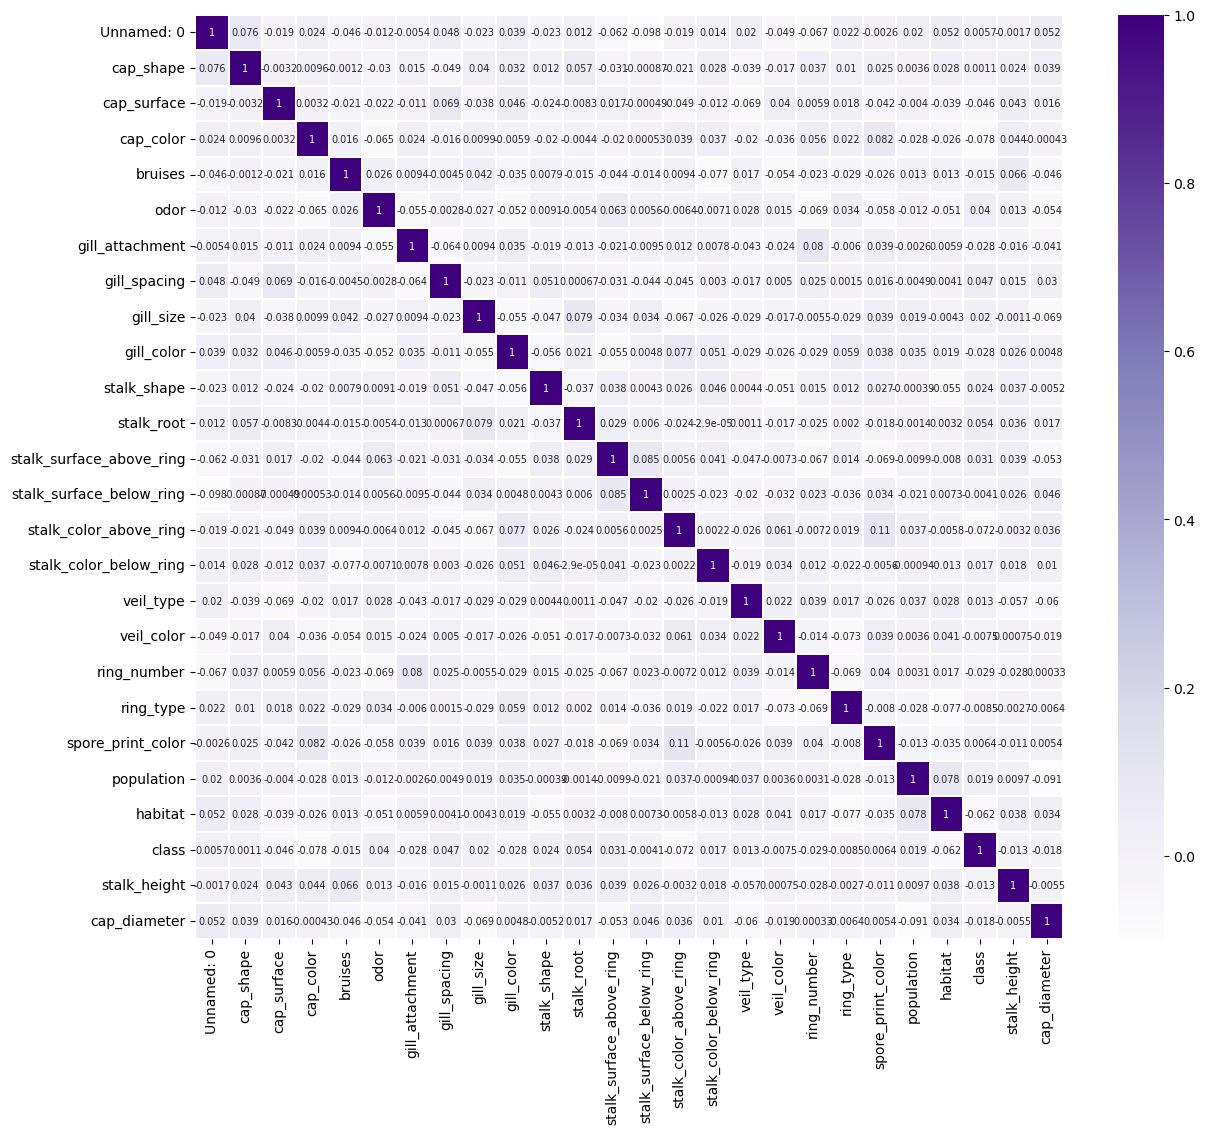

In [14]:
plt.figure(figsize=(14,12))
sns.heatmap(df.corr(),linewidths=.1,cmap="Purples", annot=True, annot_kws={"size": 7})
plt.yticks(rotation=0);
#plt.savefig("corr.png", format='png', dpi=900, bbox_inches='tight')

In [15]:
df[['class', 'gill_color']].groupby(['gill_color'], as_index=False).mean().sort_values(by='class', ascending=False)


,gill_color,class
6,6,0.810185
3,3,0.751553
4,4,0.743750
0,0,0.713542
9,9,0.709924
7,7,0.684524
5,5,0.683060
10,10,0.682432
2,2,0.672727
1,1,0.657895


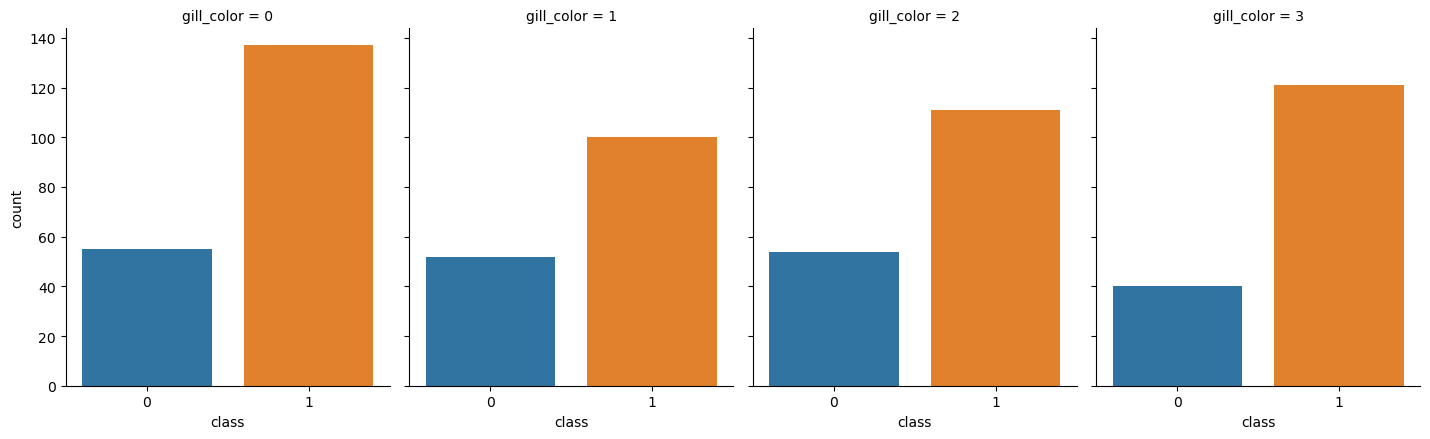

In [16]:
import seaborn as sns

new_var = df[['class', 'gill_color']]
new_var = new_var[new_var['gill_color']<=3.5]
sns.catplot(x='class', col='gill_color', data=new_var, kind='count', height=4.5, aspect=.8, col_wrap=4);
#plt.savefig("gillcolor1.png", format='png', dpi=900, bbox_inches='tight')

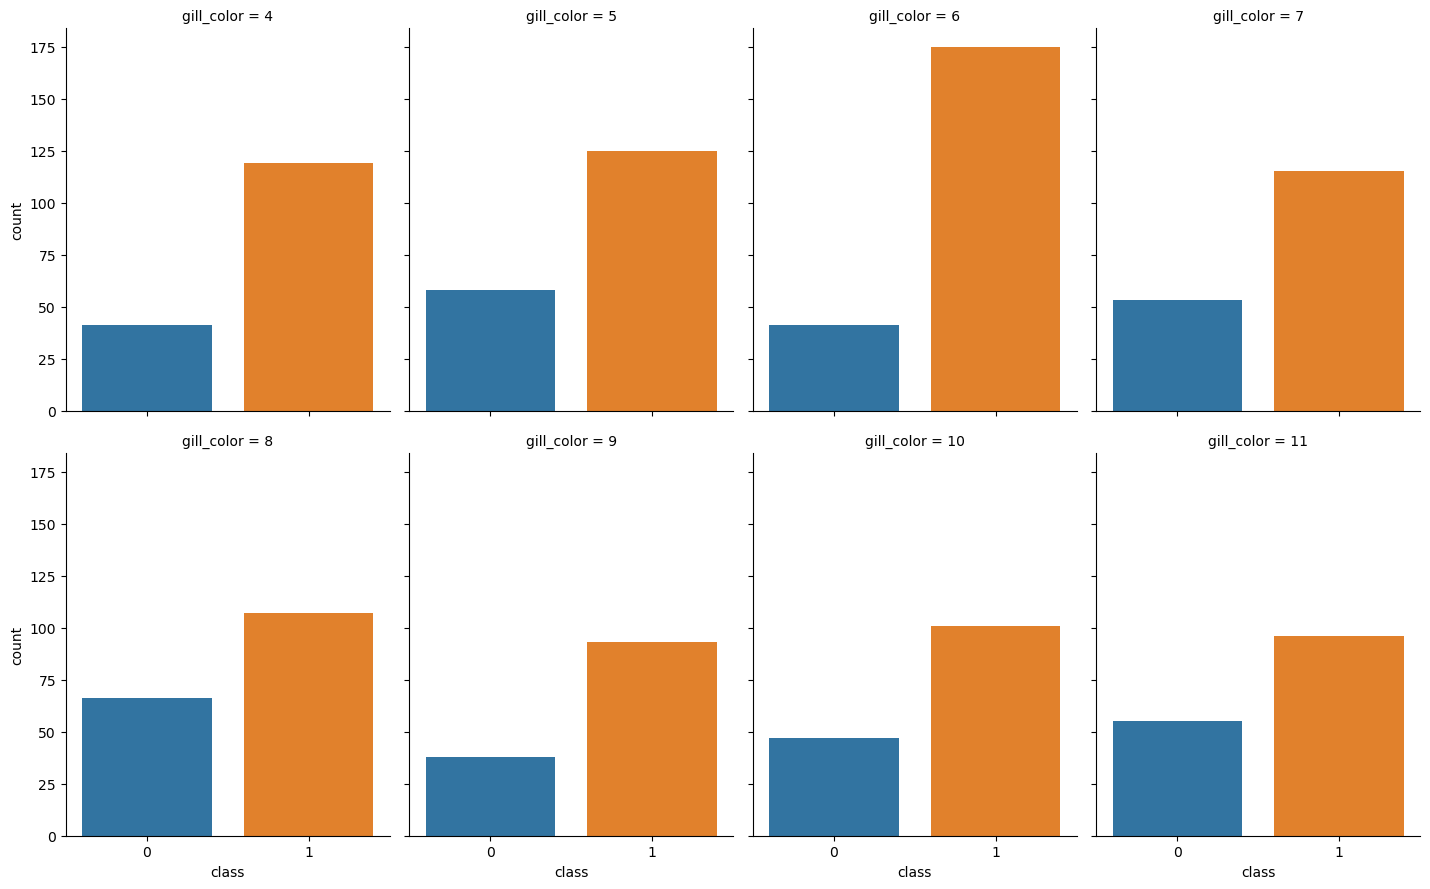

In [17]:
new_var=df[['class', 'gill_color']]
new_var=new_var[new_var['gill_color']>3.5]

sns.catplot(x='class', col='gill_color', data=new_var, kind='count', height=4.5, aspect=.8, col_wrap=4);
#plt.savefig("gillcolor2.png", format='png', dpi=900, bbox_inches='tight')

# **Preparing the Data**

In [18]:
#Setting X and y axis and splitting the data into train and test respectively.

X = df.drop(['class'], axis=1)
y = df["class"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.1)

# **Classification Methods**

# **Decision Tree Classification**

In [19]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [20]:
from sklearn.tree import export_graphviz
import graphviz

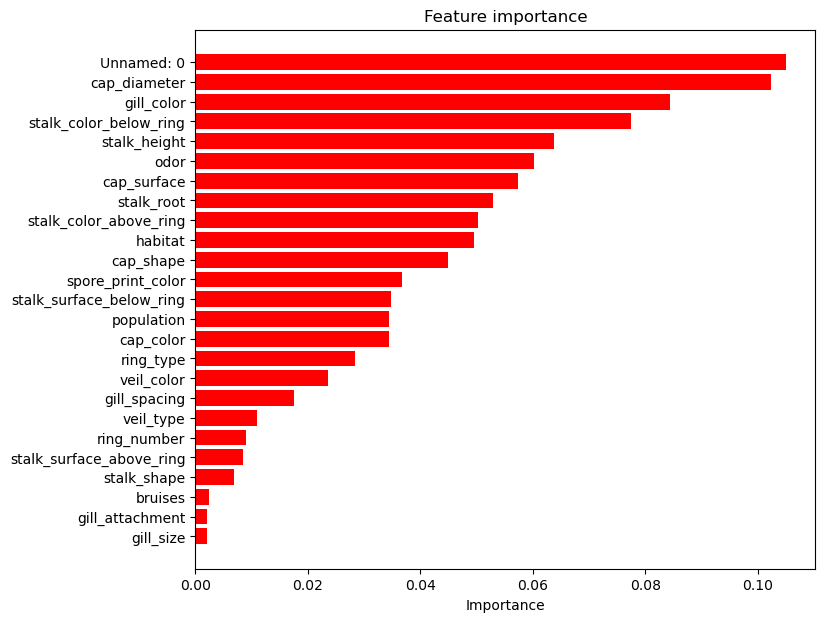

In [21]:
#Feature importance
features_list = X.columns.values
feature_importance = dt.feature_importances_
sorted_idx = np.argsort(feature_importance)

plt.figure(figsize=(8,7))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center', color ="red")
plt.yticks(range(len(sorted_idx)), features_list[sorted_idx])
plt.xlabel('Importance')
plt.title('Feature importance')
plt.draw()
#plt.savefig("featureimp.png", format='png', dpi=900, bbox_inches='tight')
plt.show()

**Predicting and estimating the result**

In [22]:
y_pred_dt = dt.predict(X_test)


In [23]:
print("Decision Tree Classifier report: \n\n", classification_report(y_test, y_pred_dt))


Decision Tree Classifier report: 

               precision    recall  f1-score   support

           0       0.90      0.78      0.83        67
           1       0.89      0.95      0.92       133

    accuracy                           0.90       200
   macro avg       0.90      0.87      0.88       200
weighted avg       0.90      0.90      0.89       200



In [24]:
print("Test Accuracy: {}%".format(round(dt.score(X_test, y_test)*100, 2)))


Test Accuracy: 89.5%


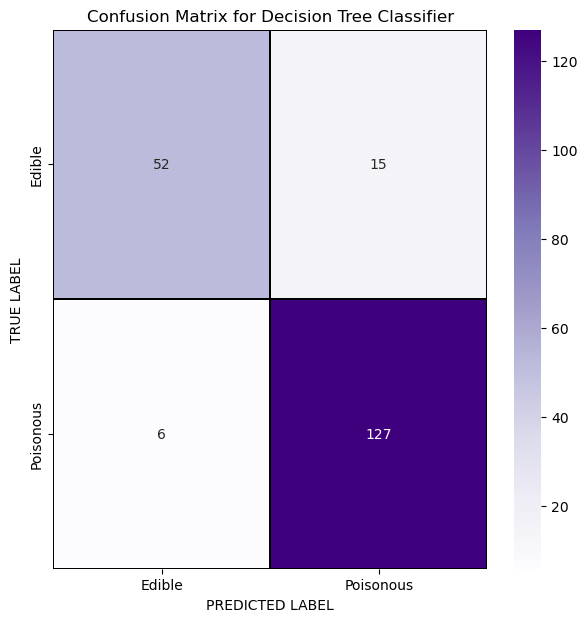

In [25]:
#Confusion Matrix for Decision Tree Classifier


cm = confusion_matrix(y_test, y_pred_dt)

x_axis_labels = ["Edible", "Poisonous"]
y_axis_labels = ["Edible", "Poisonous"]

f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Decision Tree Classifier')
#plt.savefig("dtcm.png", format='png', dpi=900, bbox_inches='tight')
plt.show()

# **SVM Classification**

In [26]:
from sklearn.svm import SVC

svm = SVC(random_state=42, gamma="auto")
svm.fit(X_train, y_train)

print("Test Accuracy: {}%".format(round(svm.score(X_test, y_test)*100, 2)))

Test Accuracy: 89.0%


In [27]:
#Classification report of SVM Classifier

y_pred_svm = svm.predict(X_test)
print("SVM Classifier report: \n\n", classification_report(y_test, y_pred_svm))

SVM Classifier report: 

               precision    recall  f1-score   support

           0       1.00      0.67      0.80        67
           1       0.86      1.00      0.92       133

    accuracy                           0.89       200
   macro avg       0.93      0.84      0.86       200
weighted avg       0.91      0.89      0.88       200



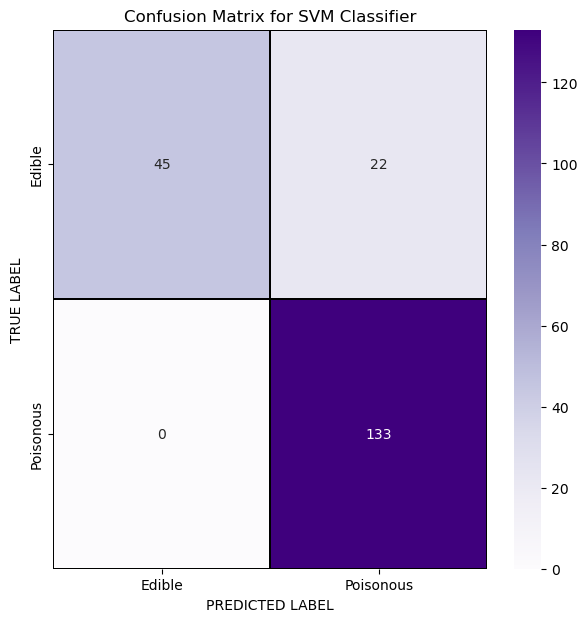

In [28]:
#Confusion Matrix for SVM Classifier

cm = confusion_matrix(y_test, y_pred_svm)

x_axis_labels = ["Edible", "Poisonous"]
y_axis_labels = ["Edible", "Poisonous"]

f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for SVM Classifier')
#plt.savefig("svmcm.png", format='png', dpi=900, bbox_inches='tight')
plt.show()

# **Predictions**
Predicting some of the X_test results and matching it with true i.e. y_test values using SVM Classifier.

In [29]:
preds = dt.predict(X_test)

print(preds[:36])
print(y_test[:36].values)

# 0 - Edible
# 1 - Poisonous

[1 1 0 1 0 1 0 0 1 1 1 1 0 1 1 1 0 1 0 1 0 1 1 0 1 1 1 1 1 0 1 1 1 0 1 0]
[1 1 0 1 0 1 0 0 1 1 1 1 0 1 1 1 0 1 1 1 0 1 1 0 1 1 1 1 1 0 0 1 1 0 1 0]


# **Conclusion**
From the confusion matrix, we saw that our train and test data is balanced.

Most of the classification methods hit above 89% accuracy with this dataset.